目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

作業: 取得另一個 dataset: titanic,

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

(3) 繪製小提琴圖

In [217]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


<AxesSubplot:xlabel='sex', ylabel='survived'>

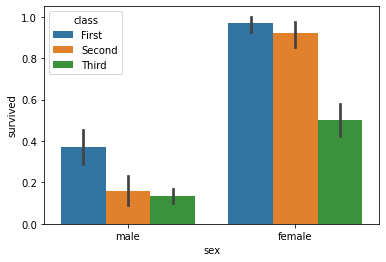

In [3]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。
#在這邊coding
sns.barplot(x="sex", y="survived", hue="class", hue_order=["First", "Second", "Third"], data=df)


繪製數據子集的小倍數。 FacetGrid 示例,

FacetGrid 類有助於可視化一個變數的分佈,以及使用多個面板在數據集子集中分別顯示多個變數之間的關係。

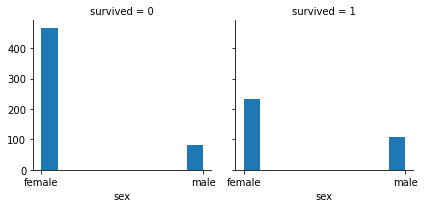

In [4]:
# 瞭解性別在各艙等的分布的存活率

#在這邊coding
g = sns.FacetGrid(data=df, col="survived")
g.map(plt.hist, "sex")



<AxesSubplot:xlabel='pclass,sex'>

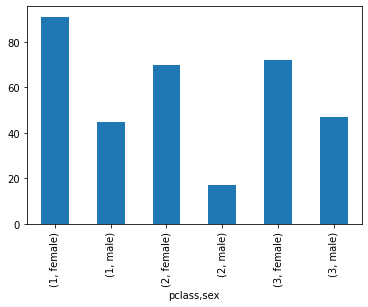

In [5]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
#其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。

df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')

In [6]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts 

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

<AxesSubplot:xlabel='pclass,sex'>

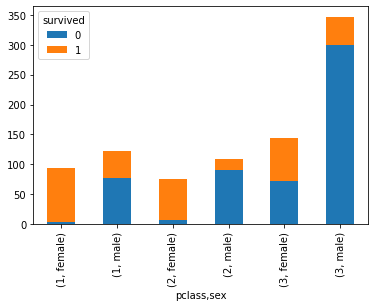

In [42]:
# 在這邊coding
# 使用survived_counts.plot做對照組
survived_counts.plot(kind="bar", stacked=True)


<AxesSubplot:xlabel='survived'>

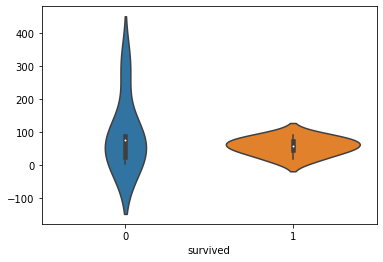

In [49]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。


# 在這邊coding
sns.violinplot(data=survived_counts)


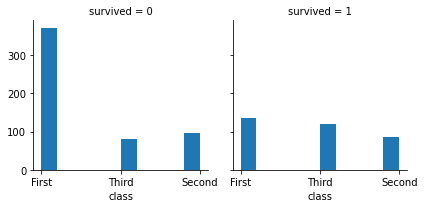

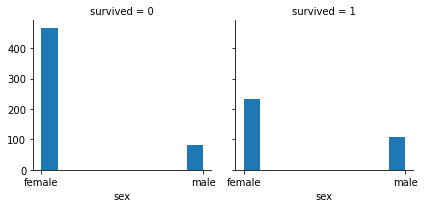

In [7]:
# 瞭解性別在各艙等的分布的存活率

# 在這邊coding
g = sns.FacetGrid(data=df, col="survived")
g.map(plt.hist, "class")
h = sns.FacetGrid(data=df, col="survived")
h.map(plt.hist, "sex")

# PS: 跟第一次做 Face.Grid 有何不同??

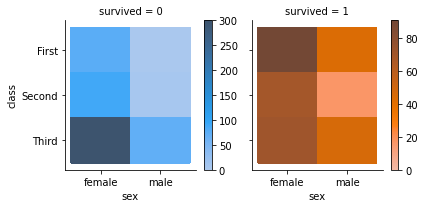

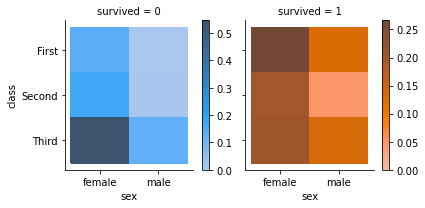

In [249]:
# show numbers
n = sns.FacetGrid(data=df, col="survived", hue="survived")
n.map(sns.histplot, "sex", "class", data=df, legend=True, stat="count", cbar=True)
plt.show()

# show probability
p = sns.FacetGrid(data=df, col="survived", hue="survived")
p.map(sns.histplot, "sex", "class", data=df, legend=True, stat="probability", cbar=True)
plt.show()
